# Deep Learning (Fall 2023) - Homework 4

*Developed by Hongtau Wu & Suzanna Sia. Modified by Ping-Cheng Ku*

This notebook contains all starter code for Homework 4. Please read the written assignment carefully to ensure you include all necessary outputs in your final report. Your submission to Homework 4-notebook should include this notebook (.ipynb file), and a PDF (.pdf) of this notebook, and the hw4_utils.py file.

## Problem 1a)

### Imports

In [129]:
## External Libararies
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Data Loading

In [130]:
# Spectify Path to Provided Data Here
DATA_PATH = 'fall23_hw4_prob2_data.npy'

## Load Data and Check Dimensionality
data = np.load(DATA_PATH)
Y = data[:,2]
X = data[:,0:2]
print("Y:", Y.shape)
print("X:", X.shape)

## Polygon Boundaries
p = [[[500, 1000], [300, 800], [400, 600], [600, 600], [700, 800]],
     [[500, 600], [100, 400], [300, 200], [700, 200], [900, 400]]]
p = np.asarray(p)
p0 = p[0]
p1 = p[1]

Y: (60000,)
X: (60000, 2)


### Visualization Code

Do not touch any of the visualization code below.

In [154]:
## Helper code for visualisation (No Need to Touch)
def visualize_polygons(p0, p1):

    fig, ax = plt.subplots()
    patches = []
    polygon1 = Polygon(p0, closed=True)
    polygon2 = Polygon(p1, closed=True)
    patches.append(polygon1)
    patches.append(polygon2)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)
    ax.autoscale_view()
    plt.show()

def visualize_datapoints(X, Y):

    assert(X.shape[0] == Y.shape[0])
    fig, ax = plt.subplots()
    npts = 60000
    col = np.where(Y[:npts]==1,'m','b')
    x1 = X[:npts][:,0]
    x2 = X[:npts][:,1]
    ax.scatter(x1, x2, s=0.5, c=col, zorder=1)
    plt.show()

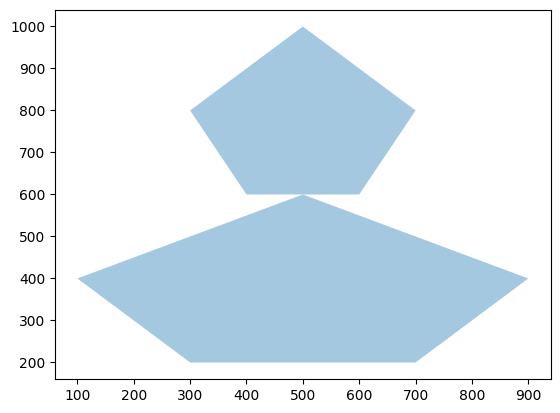

In [132]:
visualize_polygons(p0,p1)


Please fill in all code blocks marked with a #TODO.

In [133]:
def threshold_activation1(x):
    """
    Args:
      x (np.ndarray): input array

    Returns (np.ndarray): output array (with the same shape as input array)

    """
    ret = np.zeros_like(x)
    for ind, val in enumerate(x):
        if val > 0:
            ret[ind] = 1
    return ret

def and_gate(x):
    """
    Args:
      x (np.ndarray): array with shape (n, 1), representing n neurons as inputs.

    Returns: (int): scalar of 1 or 0
    """
    sum = np.sum(x)
    return sum >= x.size

def or_gate(x):
    """
    Args:
      x (np.ndarray): array with shape (n, 1)

    Returns: (int): scalar of 1 or 0
    """
    sum = np.sum(x)
    return sum > 0

def analytical_parameters(p0, p1):
    """

    """
    ## Dimensionality
    x_dim = 2
    class_num = 2
    hidden_unit_num = 10
    # First Layer Parameter
    W = np.zeros((hidden_unit_num, x_dim))
    b = np.zeros((hidden_unit_num, 1))
    for i in range(5):
        # First polygon
        x1 = p0[i, 0]
        y1 = p0[i, 1]
        x2 = p0[(i+1)%5, 0]
        y2 = p0[(i+1)%5, 1]
        W[i, :] = [y1 - y2, x2 - x1]
        b[i, :] = x1 * y2 - x2 * y1
        # Second polygon
        x1 = p1[i, 0]
        y1 = p1[i, 1]
        x2 = p1[(i+1)%5, 0]
        y2 = p1[(i+1)%5, 1]
        W[i + 5, :] = [y1 - y2, x2 - x1]
        b[i + 5, :] = x1 * y2 - x2 * y1
    return W,b

def predict_output_v1(X, W, b):

    predictions = []
    for idx in range(data.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))     # x.shape (2,1)
        # First layer
        # W.shape (10, 2), b.shape (10, 1)
        first_layer_output = np.matmul(W, x) + b # first_layer_output.shape (10, 1)
        first_layer_output = threshold_activation1(first_layer_output) #first_layer_output.shape (10, 1)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        second_polygon = first_layer_output[5:10, :]
        first_gate_output = and_gate(first_polygon)
        second_gate_output = and_gate(second_polygon)
        # Output layer
        input_to_final_gate = [first_gate_output, second_gate_output]
        prediction = or_gate(input_to_final_gate)
        predictions.append(prediction)
    return predictions

def predict_output_v2(X, W, b):
    """

    """
    ## Cache of Predictions
    predictions = []
    ## Cycle Trhough Data Points
    for idx in range(X.shape[0]):
        x = np.reshape(X[idx, :], (2, 1))
        # First layer
        first_layer_output = np.matmul(W, x) + b
        first_layer_output = threshold_activation1(first_layer_output)
        # Second layer
        first_polygon = first_layer_output[0:5, :]
        first_gate_output = and_gate(first_polygon)
        # Output layer
        predictions.append(first_gate_output)
    return predictions

def calc_accuracy(true_y, pred_y):
    """

    """
    true_prediction_num = 0
    for i, py in enumerate(pred_y):
        if py == true_y[i]:
            true_prediction_num += 1
    accuracy = true_prediction_num / len(pred_y)
    print("Accuracy: ", accuracy)
    return accuracy

*Sanity check:* If you correctly implemented the 'and gate' and 'or gate', all points should be classified correctly when you make predictions using `predict_output_v1()`. You should provide the datapoint visualization plot and the accuracy in your report submission.



Accuracy:  1.0
X [[6.49847012e-03 5.80672587e+02]
 [2.32331368e-02 2.76760097e+02]
 [2.86505037e-02 3.76217217e+01]
 ...
 [1.19989892e+03 8.06861339e+02]
 [1.19993437e+03 5.79008403e+02]
 [1.19997984e+03 9.82452673e+02]] Y [False False False ... False False False] x1 [6.49847012e-03 2.32331368e-02 2.86505037e-02 ... 1.19989892e+03
 1.19993437e+03 1.19997984e+03], x2 [580.67258685 276.76009685  37.62172166 ... 806.86133942 579.00840295
 982.45267329]
X dtype: float64
Y dtype: bool
x1 dtype: float64
x2 dtype: float64


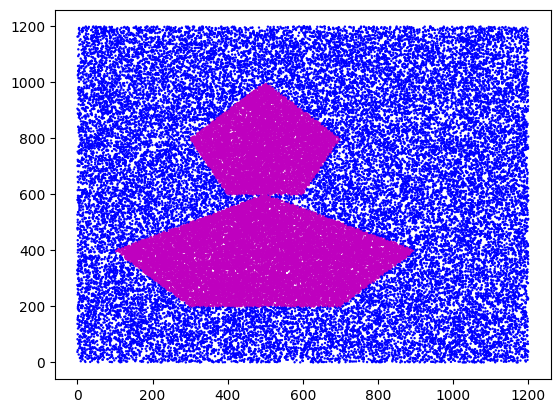

In [134]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v1(X, W, b)

## Compute Accuracy
acc = calc_accuracy(Y, pred_Y)
assert (acc == 1)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

In the code above, change the gates in `predict_output_v2()` such that only the points in the top polygon are classified correctly. Visualize your result, report the accuracy of this model, and attach it to the report submission.

To further clarify, you should **only** change the usage of the gating functions, not the code inside the gating function itself.

X [[6.49847012e-03 5.80672587e+02]
 [2.32331368e-02 2.76760097e+02]
 [2.86505037e-02 3.76217217e+01]
 ...
 [1.19989892e+03 8.06861339e+02]
 [1.19993437e+03 5.79008403e+02]
 [1.19997984e+03 9.82452673e+02]] Y [False False False ... False False False] x1 [6.49847012e-03 2.32331368e-02 2.86505037e-02 ... 1.19989892e+03
 1.19993437e+03 1.19997984e+03], x2 [580.67258685 276.76009685  37.62172166 ... 806.86133942 579.00840295
 982.45267329]
X dtype: float64
Y dtype: bool
x1 dtype: float64
x2 dtype: float64


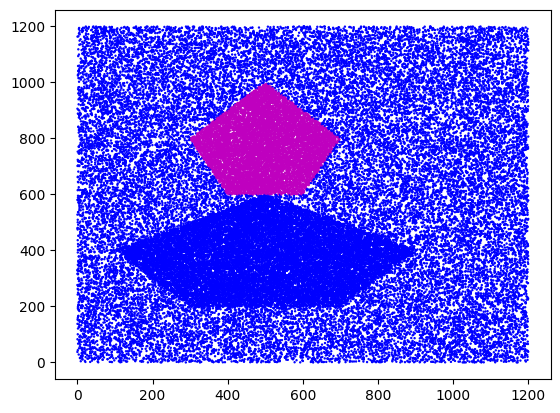

In [135]:
## Load Our Parameters
W, b = analytical_parameters(p0, p1)

## Make Predictions
pred_Y = predict_output_v2(X, W, b)

## Visualize Predictions
visualize_datapoints(X, np.array(pred_Y))

## Problem 1b-d

Complete problems 1b through 1d in the space below. Please use markdown to clearly distinguish your answers for each part. Include appropriate visualizations generated here in your final report.


In [136]:
import torch
import torch.nn as nn
import random

In [137]:
## HyperParameters (Do not adjust for Question 1b)##

n_epoch = 500
n_seed = 5
lr = 1
batch_size = 5000

test_split = 1/6

layer_1_node = 10
layer_2_node = 2

#######################
layer_dims = [layer_1_node, layer_2_node]
seed_values = [random.randint(0, 10000) for _ in range(5)]

Complete the implementation of the MLP class and preprocess_data function below. Refer to the pytorch API to understand how a proper model (module) should be set up and initialized.

In [147]:
class MLP(nn.Module):
    """
    MLP class to create a multi-layer perceptron dynamically.

    Args:
        input_dim (int): The dimensionality of the input features.
        layers_dims (list of int): A list specifying the number of units in each hidden layer.
        output_dim (int): The dimensionality of the output.
        seed_value (int, optional): Random seed for reproducibility. If this is set to None, no manual seed is set.

    Attributes:
        layers (nn.ModuleList): A ModuleList to hold all the layers including input, hidden and output layers.
    """

    def __init__(self, input_dim, layers_dims, output_dim, seed_value=None):
        """
        Initialize MLP.
        """
        super(MLP, self).__init__()

        ## TODO:

        self.layers = nn.ModuleList()

        full_dims = [input_dim] + layers_dims + [output_dim]

        # Add the hidden layers
        for i in range(1, len(full_dims)):
            self.layers.append(nn.Linear(full_dims[i-1], full_dims[i]))
            self.layers.append(nn.Sigmoid()) # can move out of the for loop and throw it just at the end, after output layer

        # Move all layers to Cuda
        for layer in self.layers:
            layer.cuda()

        # Initialize the weights and biases of the model
        if seed_value is not None:
            torch.manual_seed(seed_value)
        self._initialize_weights()

    def _initialize_weights(self):
        """
        Initialize the weights and biases of the model.
        """

        ## TODO:
        # Initialize the weights and biases for each layer
        for layer in self.layers:
            if isinstance(layer, nn.Linear):
                nn.init.xavier_uniform_(layer.weight)
                nn.init.uniform_(layer.bias)


    def forward(self, x):
        """
        Forward pass through the network.

        Args:
            x (torch.Tensor): input tensor.

        Returns:
            torch.Tensor: output tensor.
        """
        # TODO:
        x.cuda()
        x = x.float()
        for layer in self.layers:
            x = layer(x)
        
        return x

In [139]:
def preprocess_data(X, Y, test_split=1/6):
  """
  Base on your observation of the dataset, perform any necessary preprocessing steps given data X and label Y

  Args:
    X, Y (np.ndarry): input arrays
    test_split (float): proportion of data to use for test set (default is set to 1/6)

  Return:
    X_train, X_test, y_train, y_test (torch.Tensor): output tensor objects for training/testing.

  """

  # Note - If you plan to use additional functions, please define them as inner functions
  # under preprocess_data. This will allow us to export preprocess_data function and test
  # it thorough autograder properly. For instance:

  # ... def preprocess_data(X, Y, test_split):
  # ...
  # ...     def inner_func():
  # ...         print("Hello, World!")
  # ...
  # ...     inner_func()

  # Tips: For debugging purposes, it is a good practice to perform unit tests on your inner functions
  # before you place them under the preprocess_data function.

  # TODO:

  def train_test_split(X, Y, test_size):
    """
    Split the data into training and testing sets.

    Args:
        X (np.ndarray): input array.
        Y (np.ndarray): target array.
        test_size (float or int): proportion of data to use for the test set.

    Returns:
        X_train, X_test, y_train, y_test (np.ndarray): output arrays for training/testing.
    """
    # Shuffle the data
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X = X[indices]
    Y = Y[indices]

    # Calculate the number of samples for the test set
    if isinstance(test_size, float):
      test_size = int(len(X) * test_size)

    # Split the data into training and testing sets
    X_train = X[:-test_size]
    X_test = X[-test_size:]
    y_train = Y[:-test_size]
    y_test = Y[-test_size:]

    return X_train, X_test, y_train, y_test

  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_split)

  # Convert the data to torch tensors
  X_train = torch.tensor(X_train)
  X_test = torch.tensor(X_test)
  y_train = torch.tensor(y_train)
  y_test = torch.tensor(y_test)

  # Calculate the mean and standard deviation of the training data
  mean = torch.mean(X_train)
  std = torch.std(X_train)

  # Normalize the training data
  X_train = (X_train - mean) / std

  # Calculate the mean and standard deviation of the test data
  mean = torch.mean(X_test)
  std = torch.std(X_test)

  # Normalize the testing data using the same mean and standard deviation
  X_test = (X_test - mean) / std

  return (X_train, X_test, y_train, y_test)


In [140]:
# Reload the data
data = np.load(DATA_PATH)

Y = data[:,2]
X = data[:,0:2]

X_train, X_test, y_train, y_test = preprocess_data(X, Y, test_split)

Implement the train loop (for a single run)


In [151]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

def train(model,
          loss_f,
          optimizer,
          X_train,
          y_train,
          X_test=None,
          y_test=None,
          n_epoch=500,
          batch_size=None,
          seed_value=0):
    print(f"n_epoch {n_epoch}, batch_size {batch_size}")
    """
      The main function for model training.

      Args:
        model (torch.nn.Module): model to train
        loss_f (torch.nn.Module): loss function
        optimizer (torch.optim.Optimizer): optimizer
        X_train, y_train (torch.Tensor): training data
        X_test, y_test (torch.Tensor): test data
        n_epoch (int): number of epochs
        batch_size (int): size of the batch
        seed_value (int): random seed value

      Returns:
        .... (to be added by student)

    """

    def create_data_loader(X, y, batch_size=1, shuffle=True):
      """
      Create a DataLoader object.

      Args:
          X (torch.Tensor): input tensor.
          y (torch.Tensor): target tensor.

      Returns:
          torch.utils.data.DataLoader: DataLoader object.
      """
      # Create a TensorDataset object
      dataset = TensorDataset(X, y.float())


      # Create a DataLoader object
      data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

      return data_loader

    # TODO: Complete the train function. You need to implement mini-batch training for this question.
    #
    # Tips: Perform proper sanity checks to ensure your inputs are reasonable. Keep track of important variables
    # (loss, accuracy) throughout the training loop. Print intermediate values reguarly to help you track if
    # your training is working as intended (so that if something is wrong you can terminate the process early
    # instead of going through all 5 runs.)

    # TODO: Add the necessary return statement based on your requirements

    # Set the random seed for reproducibility
    torch.manual_seed(seed_value)

    # Check if batch_size is provided, otherwise use the full dataset
    if batch_size is None:
      batch_size = len(X_train)

    # Preprocess the data
    X_train, X_test, y_train, y_test = preprocess_data(X_train, y_train, test_split)

    # Creates data loaders for training and testing sets
    train_loader = create_data_loader(X_train, y_train, batch_size=batch_size, shuffle=True) 
    test_loader = create_data_loader(X_test, y_test, batch_size=1, shuffle=False)

    trainL = np.empty((0, ), dtype=float)
    trainA = np.empty((0, ), dtype=float)
    testL = np.empty((0, ), dtype=float)
    testA = np.empty((0, ), dtype=float)

    # Training loop
    for epoch in range(n_epoch):
      model.train() # Set the model to training mode
      model.cuda()
      
      for batch_X, batch_y in train_loader:
        # Forward pass
        y_pred = model(batch_X.cuda())
        y_pred = torch.squeeze(y_pred)
        batch_y.cuda()
        loss = loss_f(y_pred.cuda(), batch_y.cuda())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

      if epoch % 10 == 0:
        model.eval() # Set the model to evaluation mode
        model.cpu()
        with torch.no_grad():
          train_loss = 0.0
          train_acc = 0.0
          for batch_X, batch_y in train_loader:
            y_pred = model(batch_X)
            y_pred = torch.squeeze(y_pred)
            train_loss += loss_f(y_pred, batch_y)
            # print(f"y_pred {y_pred}, batch_y {batch_y}")
            train_acc += ((y_pred >= 0.5) == batch_y).sum().item()
          train_acc /= len(X_train)

          trainL = np.append(trainL, train_loss)
          trainA = np.append(trainA, train_acc)

          test_loss = 0.0
          test_acc = 0.0
          for batch_X, batch_y in test_loader:
            y_pred = model(batch_X)
            # print(f"test y_pred {y_pred} and batch_y {batch_y}")
            y_pred = y_pred[0]
            test_loss += loss_f(y_pred, batch_y)
            test_acc += ((y_pred >= 0.5) == batch_y).sum().item()
          test_acc /= len(X_test)

          testL = np.append(testL, test_loss)
          testA = np.append(testA, test_acc)

          print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

    return [trainL, trainA, testL, testA, X_test, y_test]

Now we start the training. We will iterate through 5 runs. To ensure reproducibility of the performance, we will be using the seed values to initialize our MLP and in our training loop. After the training, you should "**check if you can get the same model accuracy if a seed is re-used**".

In [152]:
# TODO: complete the cell

results = []

## Iterate over Random Initializations
for idx in range(len(seed_values)):
    seed_value = seed_values[idx]
    print("~~ Beginning run {} with seed value {} ~~".format(idx, seed_value))

    ## Initialize Model
    model = MLP(input_dim=2, layers_dims=layer_dims, output_dim=1, seed_value=seed_value)

    loss_f = nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Train the model
    result = train(model, loss_f, optimizer, X, Y, n_epoch=n_epoch, batch_size=batch_size, seed_value=seed_value)
    results.append(result)

~~ Beginning run 0 with seed value 2603 ~~
n_epoch 500, batch_size 5000


/home/kevthatdevs/code/python/venv/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch 0: Train Loss: 6.9189, Train Acc: 0.6433, Test Loss: 6920.5391, Test Acc: 0.6443
Epoch 10: Train Loss: 6.3013, Train Acc: 0.6604, Test Loss: 6287.1528, Test Acc: 0.6630
Epoch 20: Train Loss: 5.6059, Train Acc: 0.7049, Test Loss: 5591.1924, Test Acc: 0.7069
Epoch 30: Train Loss: 5.3023, Train Acc: 0.7264, Test Loss: 5291.6846, Test Acc: 0.7250
Epoch 40: Train Loss: 5.1779, Train Acc: 0.7303, Test Loss: 5166.0967, Test Acc: 0.7283
Epoch 50: Train Loss: 4.9374, Train Acc: 0.7518, Test Loss: 4913.9155, Test Acc: 0.7512
Epoch 60: Train Loss: 4.1004, Train Acc: 0.8522, Test Loss: 4084.4507, Test Acc: 0.8527
Epoch 70: Train Loss: 3.6426, Train Acc: 0.8651, Test Loss: 3633.7654, Test Acc: 0.8635
Epoch 80: Train Loss: 3.4333, Train Acc: 0.8694, Test Loss: 3427.4468, Test Acc: 0.8688
Epoch 90: Train Loss: 3.2917, Train Acc: 0.8746, Test Loss: 3288.6086, Test Acc: 0.8742
Epoch 100: Train Loss: 3.1778, Train Acc: 0.8798, Test Loss: 3178.6479, Test Acc: 0.8778
Epoch 110: Train Loss: 3.0851, T

On run 0


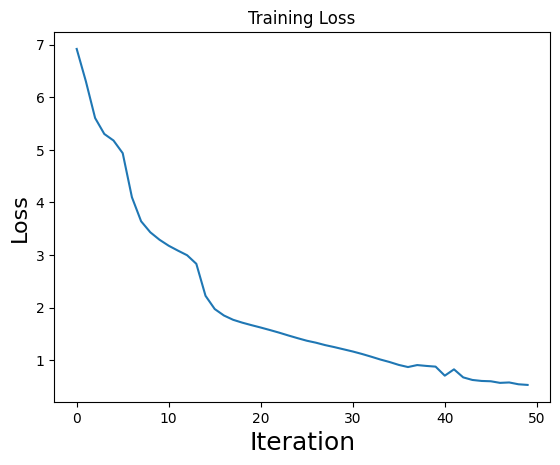

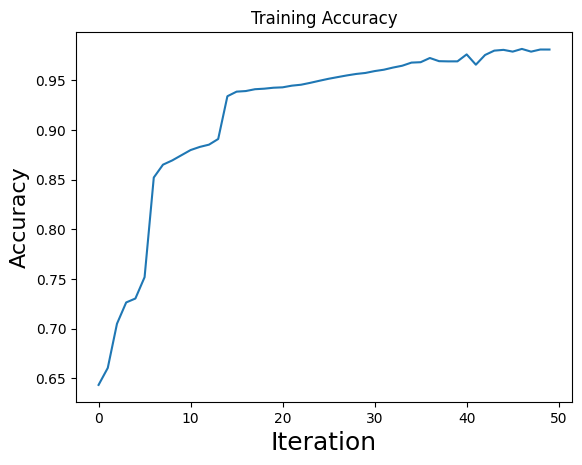

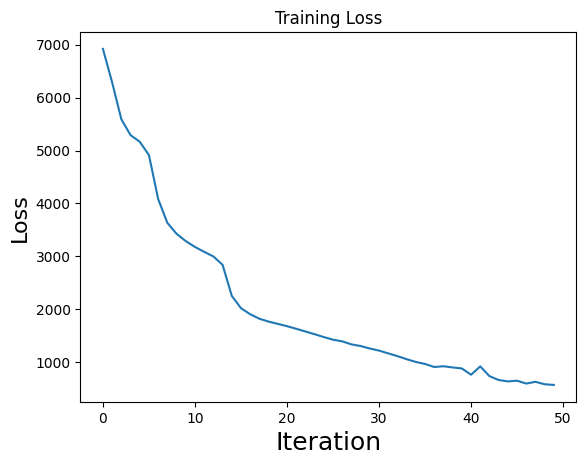

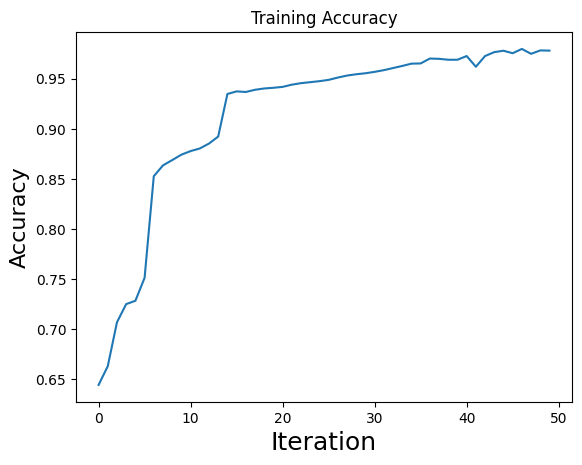

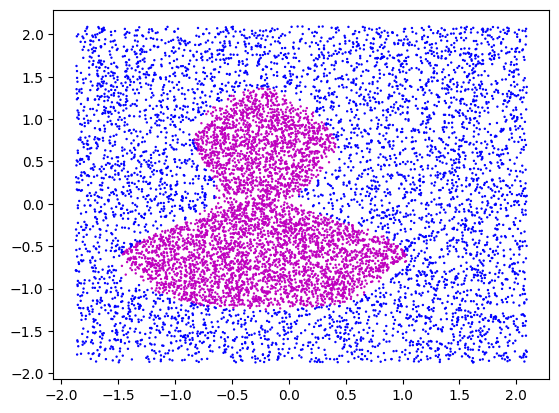

On run 1


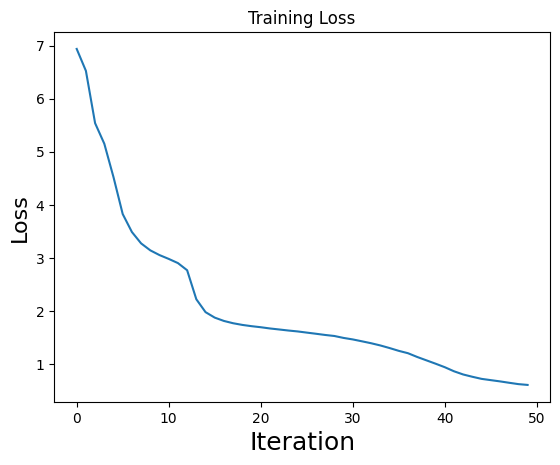

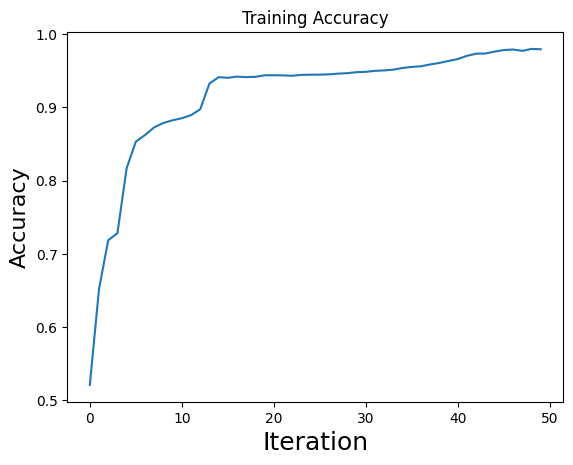

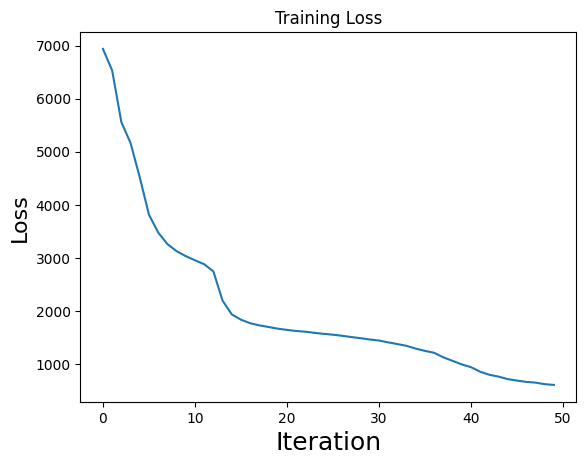

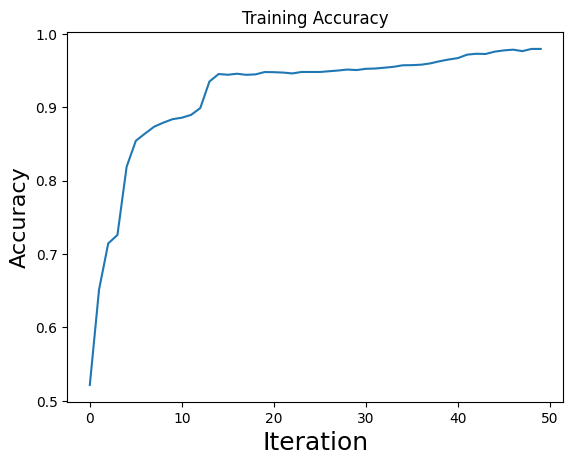

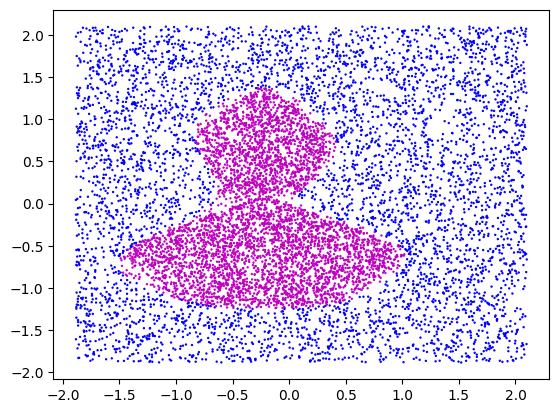

On run 2


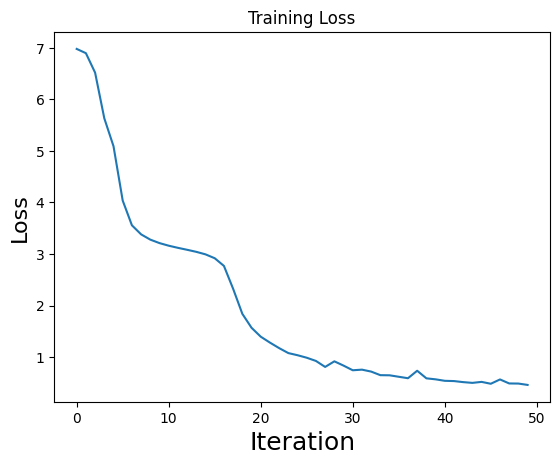

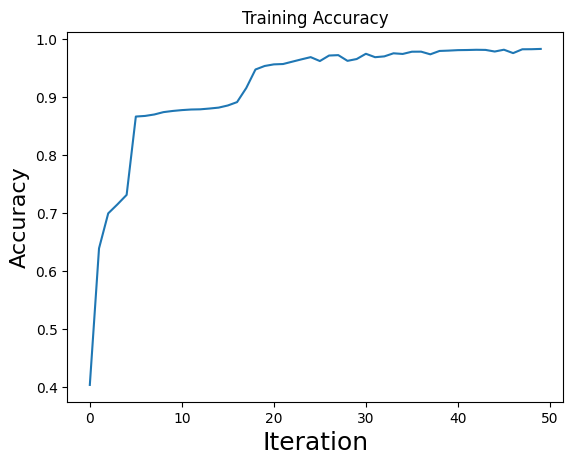

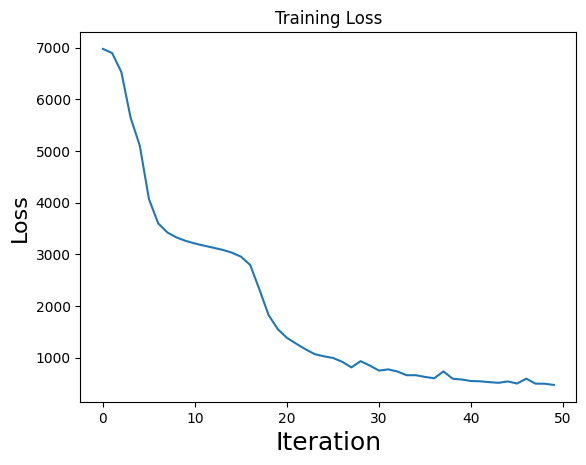

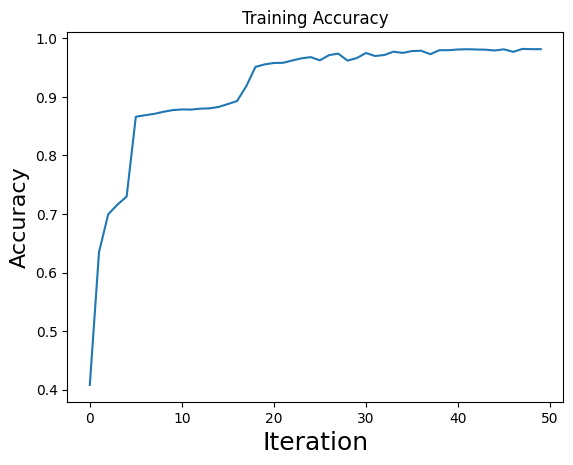

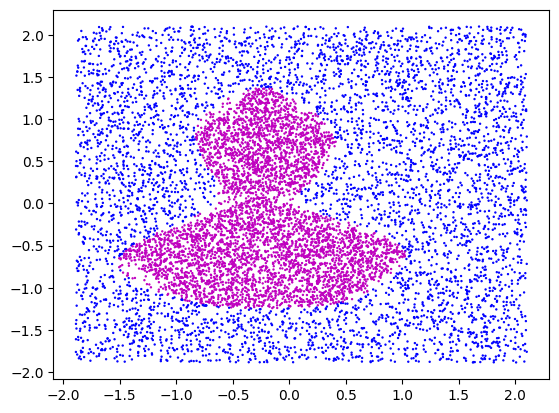

On run 3


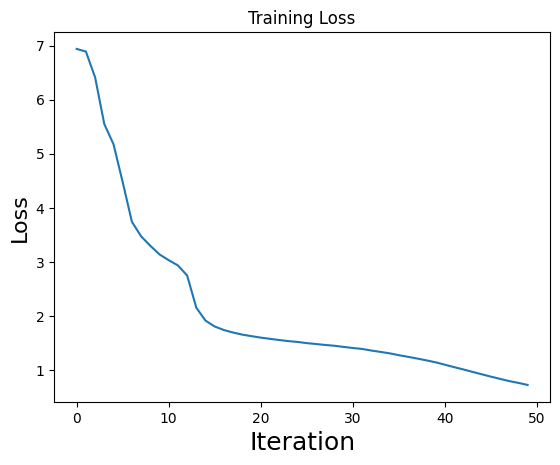

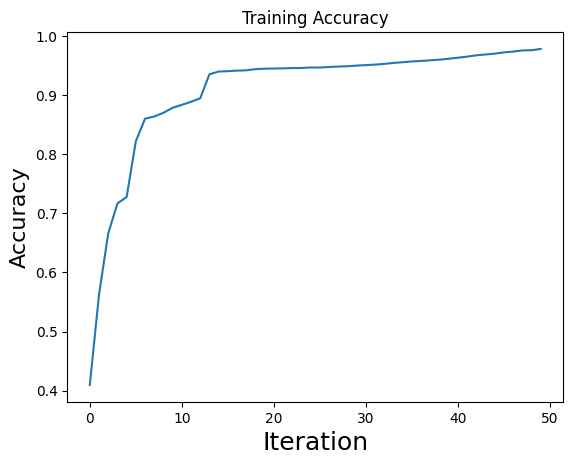

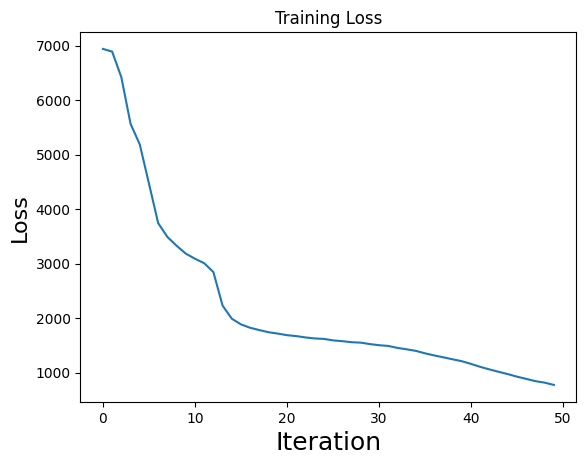

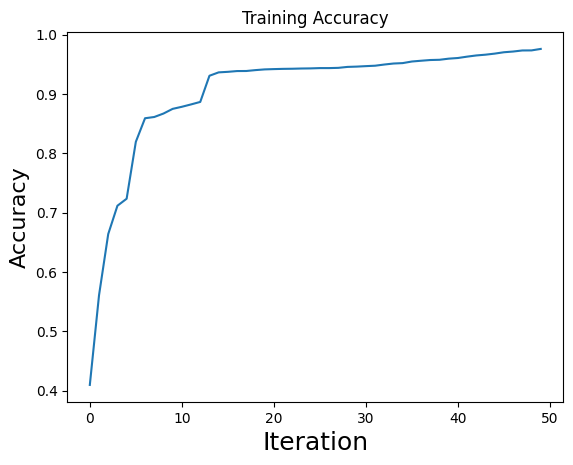

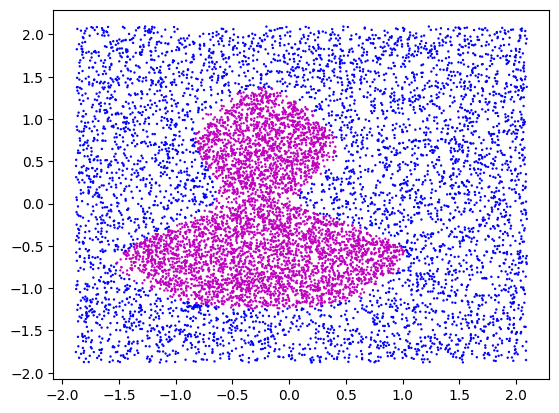

On run 4


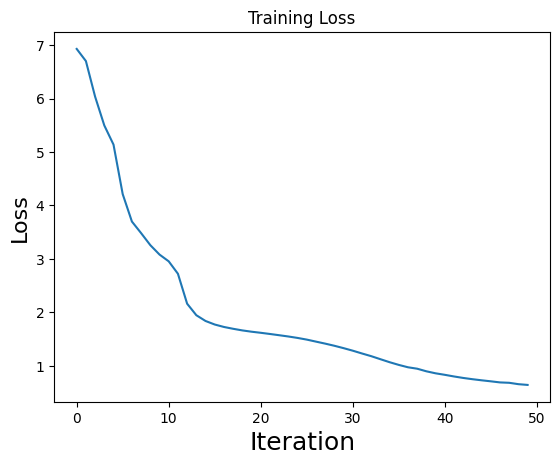

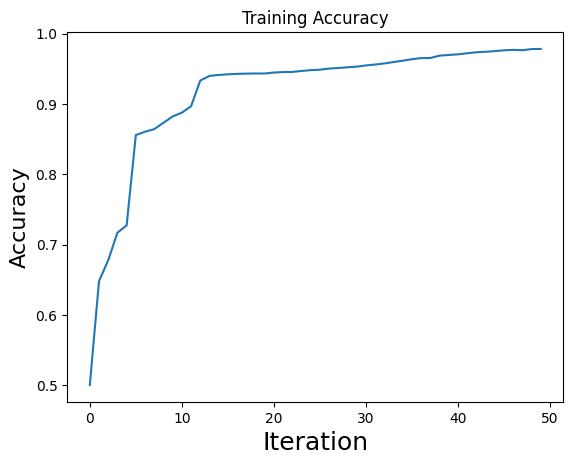

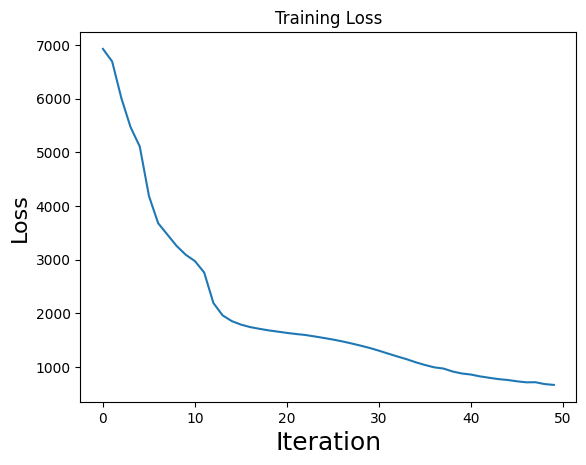

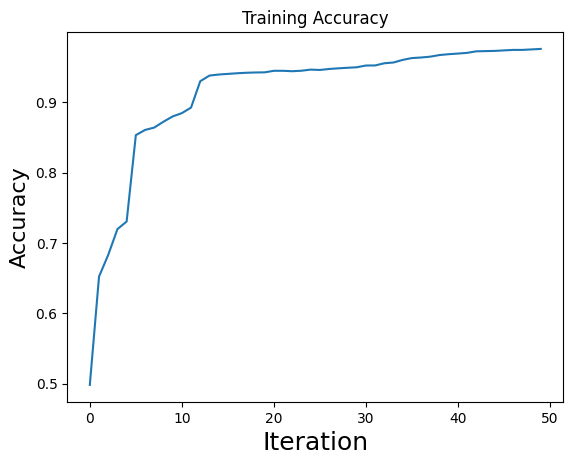

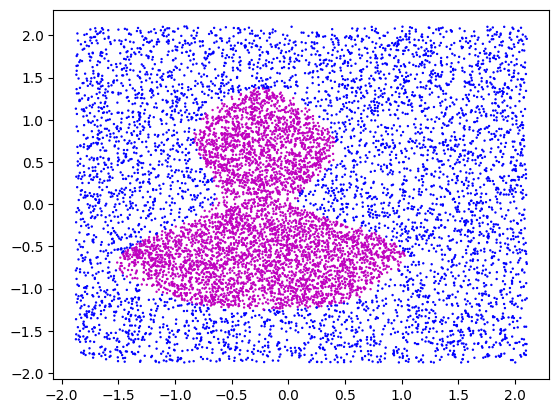

In [155]:
# TODO: Plot Results (Please plot the loss of all 5 runs in a same figure, and
# the accuracy of the runs in another figure). Use visualize_datapoints to check
# the performance of your model.

for idx, result in enumerate(results):
    print(f"On run {idx}")
    ## Plot Loss and Accuracy
    L = result[0]
    A = result[1]
    fig0=plt.figure(0)
    plt.plot(L,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Loss', fontsize=16)
    plt.title("Training Loss")
    plt.show()
    fig1=plt.figure(1)
    plt.plot(A,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title("Training Accuracy")
    plt.show()

    L = result[2]
    A = result[3]
    fig0=plt.figure(0)
    plt.plot(L,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Loss', fontsize=16)
    plt.title("Training Loss")
    plt.show()
    fig1=plt.figure(1)
    plt.plot(A,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title("Training Accuracy")
    plt.show()

    ## Visualize Predictions

    ## Make Predictions
    model.eval()
    model.cpu()
    plot_pred_Y = model(results[idx][4]) >= 0.5
    visualize_datapoints(results[idx][4].detach().numpy(), plot_pred_Y.squeeze().detach().numpy())



In [157]:
# Problem 1c: make adjustments to the layers, and then re-run the training loop with 5 runs and visualizations

## Hyperparameters

n_epoch = 500
n_seed = 5
lr = 1
batch_size = 5000

test_split = 1/6

#######################
layer_1_node = 10
layer_2_node = 10
layer_3_node = 10
layer_4_node = 2

layer_dims = [layer_1_node, layer_2_node, layer_3_node, layer_4_node]

##########################
seed_values = [random.randint(0, 10000) for _ in range(5)]

##########################
results = []

## Iterate over Random Initializations
for idx in range(len(seed_values)):
    seed_value = seed_values[idx]
    print("~~ Beginning run 1:{} with seed value {} ~~".format(idx, seed_value))

    ## Initialize Model
    model = MLP(input_dim=2, layers_dims=layer_dims, output_dim=1, seed_value=seed_value)

    loss_f = nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Train the model
    result = train(model, loss_f, optimizer, X, Y, n_epoch=n_epoch, batch_size=batch_size, seed_value=seed_value)
    results.append(result)

#######################
layer_1_node = 20
layer_2_node = 2

layer_dims = [layer_1_node, layer_2_node]

##########################

for idx in range(len(seed_values)):
    seed_value = seed_values[idx]
    print("~~ Beginning run 2:{} with seed value {} ~~".format(idx, seed_value))

    ## Initialize Model
    model = MLP(input_dim=2, layers_dims=layer_dims, output_dim=1, seed_value=seed_value)

    loss_f = nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Train the model
    result = train(model, loss_f, optimizer, X, Y, n_epoch=n_epoch, batch_size=batch_size, seed_value=seed_value)
    results.append(result)

#######################
layer_1_node = 20
layer_2_node = 15
layer_3_node = 10
layer_4_node = 2

layer_dims = [layer_1_node, layer_2_node, layer_3_node, layer_4_node]

##########################

for idx in range(len(seed_values)):
    seed_value = seed_values[idx]
    print("~~ Beginning run 3:{} with seed value {} ~~".format(idx, seed_value))

    ## Initialize Model
    model = MLP(input_dim=2, layers_dims=layer_dims, output_dim=1, seed_value=seed_value)

    loss_f = nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    # Train the model
    result = train(model, loss_f, optimizer, X, Y, n_epoch=n_epoch, batch_size=batch_size, seed_value=seed_value)
    results.append(result)


# TODO: Plot Results (Please plot the loss of all 5 runs in a same figure, and
# the accuracy of the runs in another figure). Use visualize_datapoints to check
# the performance of your model.

for idx, result in enumerate(results):
    print(f"On run {idx}")
    ## Plot Loss and Accuracy
    L = result[0]
    A = result[1]
    fig0=plt.figure(0)
    plt.plot(L,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Loss', fontsize=16)
    plt.title("Training Loss")
    plt.show()
    fig1=plt.figure(1)
    plt.plot(A,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title("Training Accuracy")
    plt.show()

    L = result[2]
    A = result[3]
    fig0=plt.figure(0)
    plt.plot(L,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Loss', fontsize=16)
    plt.title("Training Loss")
    plt.show()
    fig1=plt.figure(1)
    plt.plot(A,'-')
    plt.xlabel('Iteration', fontsize=18)
    plt.ylabel('Accuracy', fontsize=16)
    plt.title("Training Accuracy")
    plt.show()

    ## Visualize Predictions

    ## Make Predictions
    model.eval()
    model.cpu()
    plot_pred_Y = model(results[idx][4]) >= 0.5
    visualize_datapoints(results[idx][4].detach().numpy(), plot_pred_Y.squeeze().detach().numpy())



~~ Beginning run 1:0 with seed value 654 ~~
n_epoch 50, batch_size 5000


/home/kevthatdevs/code/python/venv/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Epoch 0: Train Loss: 6.9293, Train Acc: 0.4996, Test Loss: 6928.8672, Test Acc: 0.5022
Epoch 10: Train Loss: 6.9266, Train Acc: 0.4672, Test Loss: 6926.7637, Test Acc: 0.4647
Epoch 20: Train Loss: 6.9233, Train Acc: 0.4966, Test Loss: 6923.7217, Test Acc: 0.4940
Epoch 30: Train Loss: 6.9171, Train Acc: 0.6648, Test Loss: 6916.8271, Test Acc: 0.6666
Epoch 40: Train Loss: 6.9070, Train Acc: 0.4970, Test Loss: 6908.3130, Test Acc: 0.4947
~~ Beginning run 1:1 with seed value 2659 ~~
n_epoch 50, batch_size 5000
Epoch 0: Train Loss: 6.9322, Train Acc: 0.5025, Test Loss: 6935.7988, Test Acc: 0.4877
Epoch 10: Train Loss: 6.9319, Train Acc: 0.5025, Test Loss: 6934.1094, Test Acc: 0.4877
Epoch 20: Train Loss: 6.9318, Train Acc: 0.5025, Test Loss: 6932.7251, Test Acc: 0.4877
Epoch 30: Train Loss: 6.9317, Train Acc: 0.5025, Test Loss: 6932.5117, Test Acc: 0.4877
Epoch 40: Train Loss: 6.9318, Train Acc: 0.5025, Test Loss: 6934.8301, Test Acc: 0.4877
~~ Beginning run 1:2 with seed value 4271 ~~
n_ep

KeyboardInterrupt: 

For Problem 1d, please write your response in the Latex report.

## Problem 2

All code for Problem 2 should go below. We provide data loaders and relevant imports to get you started. If you are working locally (instead of using Google Colab), we recommend using Conda to install pytorch (https://pytorch.org).

### Imports

In [ ]:
## Additional External Libraries (Deep Learning)
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from torchvision import transforms as tfs
from PIL import Image
from torchvision.datasets import FashionMNIST

### Data Loading

In [ ]:
# Hyperparameter (Feel free to make modifications)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = tfs.Compose([tfs.ToTensor()])

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

100.0%


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100.0%


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100.0%

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



## Problem 2a)

### Design Model

In [ ]:
class CNNet_2a(nn.Module):

    def __init__(self):
        """

        """
        ## Inherent Torch Module
        super(CNNet_2a, self).__init__()

        ##TODO: Initialize Model Layers

    def forward(self, x):
        """

        """
        ##TODO: Setup Forward Pass
        return NotImplementedError

### Model Training

In [ ]:
def train(model,
          loss_f,
          optimizer,
          n_epoch=50,
          train_dataloader=train_dataloader,
          val_dataloader=val_dataloader,
          test_dataloader=test_dataloader,
          seed_value=None):
    """

    """
    ##TODO: Implement training loop
    raise NotImplementedError

In [ ]:
## TODO: choose reasonable hyperparameters (feel free to make adjustments)
n_epoch = 50
model = CNNet_2a()
lr =
optimizer =
loss_f =

SyntaxError: invalid syntax (3122876769.py, line 4)

In [ ]:
## Run Training Loop
out = train(model, loss_f, optimizer, n_epoch=n_epoch)

## Problem 2b)

Now try to improve your model using additional techniques learned during class. You should be able to use the same training function as above, but will need to create a new model architecture.

### Data Loading

You should maintain the splits from above, but feel free to alter the dataloaders (i.e. transforms) as you wish.

In [ ]:
# Hyperparameter (Feel Free to Change These, but Make Sure your Training Loop Still Works as Expected)
TRAIN_BATCH_SIZE = 50
VAL_BATCH_SIZE = 50
TEST_BATCH_SIZE = 1

# Transform data to PIL images
transforms = ##TODO: Use the same from above or consider alternatives

# Train/Val Subsets
train_mask = range(50000)
val_mask = range(50000, 60000)

# Download/Load Dataset
train_dataset = FashionMNIST('./data', train=True, transform=transforms, download=True)
test_dataset = FashionMNIST('./data', train=False, transform=transforms, download=True)

# Data Loaders
train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, sampler=SubsetRandomSampler(train_mask))
val_dataloader = DataLoader(train_dataset, batch_size=VAL_BATCH_SIZE, sampler=SubsetRandomSampler(val_mask))
test_dataloader = DataLoader(test_dataset, batch_size=TEST_BATCH_SIZE)

### Model Design

In [ ]:
##TODO: Try to improve upon your previous architecture
class CNNet_2b(nn.Module):

### Model Training

In [ ]:
##TODO: Fit and evaluate your model. What do you observe?

## Problem 2c)

Write your response in the Latex PDF report.

## Generate hw4_utils.py file

Paste your code here to test it on autograder, this should include and_gate, or_gate, threshold_activation1, predict_output_v2, preprocess_data, MLP. This will create a file called hw4_utils.py. Note that even if some Errors show up in the autograder, it does not mean your code does not work. We will still look into your implementation manually.

In [ ]:
%%writefile hw4_utils.py

# Paste your code here to test it on autograder, this should include and_gate, or_gate,
# threshold_activation1, predict_output_v2, preprocess_data, MLP. This will create a file
# called hw4_utils.py. Note that even if some Errors show up in the autograder, it does
# not mean your code does not work. We will still look into your implementation manually.

import numpy as np
import torch
import torch.nn as nn
import random


def threshold_activation1(x):

def and_gate(x):

def or_gate(x):

def predict_output_v2(X, W, b):

def preprocess_data(X, Y, test_split=1/6):

class MLP(nn.Module):
